In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_curve, auc
)

In [5]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target

print('Dataset loaded successfully!')
print(df.head())

Dataset loaded successfully!
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter 

In [6]:
print('\nShape of Dataset: ',df.shape)
print('\nTarget Classes: ',data.target_names)
print('\nMissing Vamues: \n',df.isnull().sum().sum())


Shape of Dataset:  (569, 31)

Target Classes:  ['malignant' 'benign']

Missing Vamues: 
 0


C:\Users\dell\AppData\Local\Temp\ipykernel_36064\1266412079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df,palette='pastel')


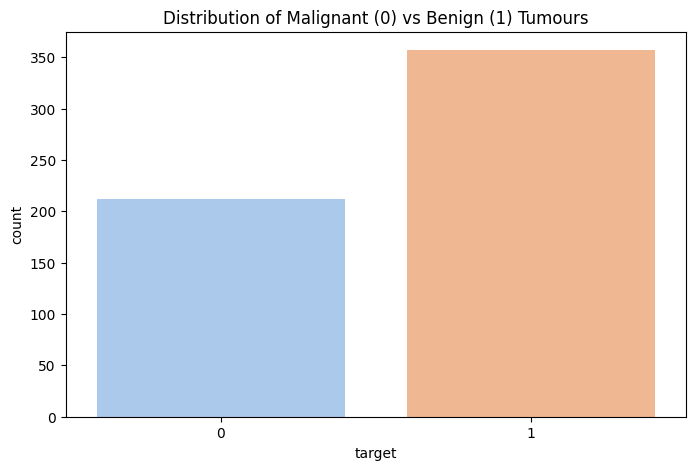

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='target',data=df,palette='pastel')
plt.title('Distribution of Malignant (0) vs Benign (1) Tumours')
plt.show()

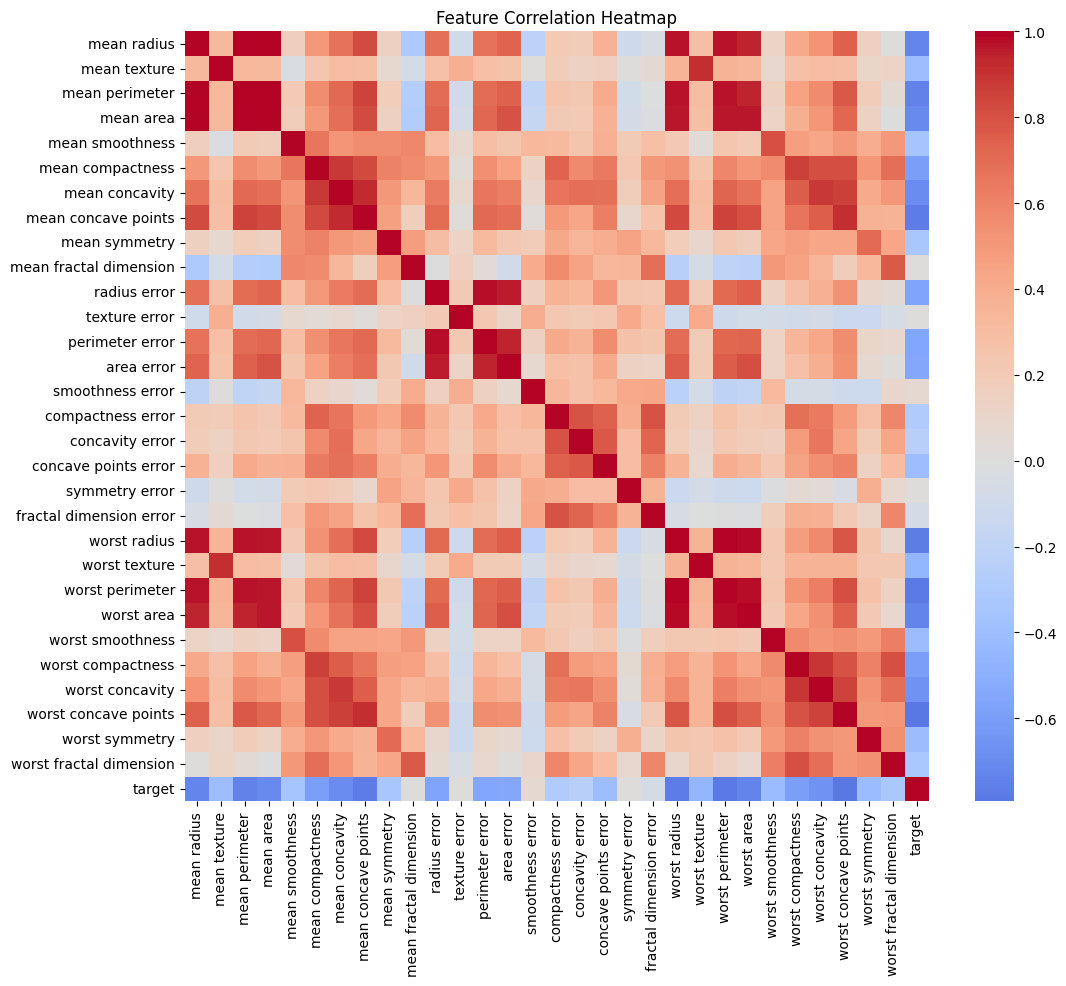

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [17]:
svm = SVC(probability=True)
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

In [18]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [19]:
models = {
    "Logistic Regression": lr_pred,
    "Support Vector Machine": svm_pred,
    "Random Forest": rf_pred
}


In [21]:
for name, pred in models.items():
    acc = accuracy_score(y_test,pred) * 100
    print(f"{name} Accuracy: {acc:2f}%")

print("\nRandom FOrest Classification Report:\n")
print(classification_report(y_test,rf_pred,target_names=data.target_names))

Logistic Regression Accuracy: 97.368421%
Support Vector Machine Accuracy: 98.245614%
Random Forest Accuracy: 96.491228%

Random FOrest Classification Report:

              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



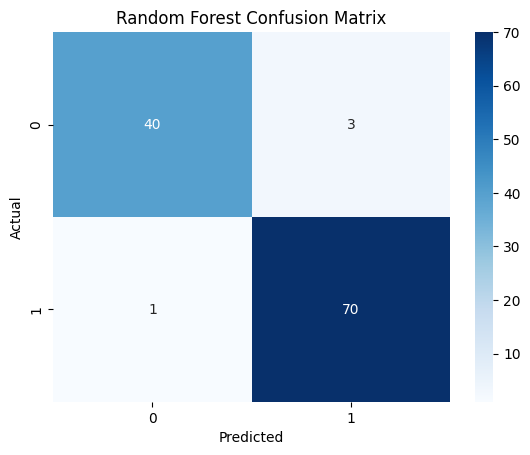

In [22]:
cm = confusion_matrix(y_test,rf_pred)
sns.heatmap(cm,annot=True,cmap="Blues",fmt='g')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_36064\3473678202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices[:10]],y = np.array(data.feature_names)[indices[:10]],palette = 'mako')


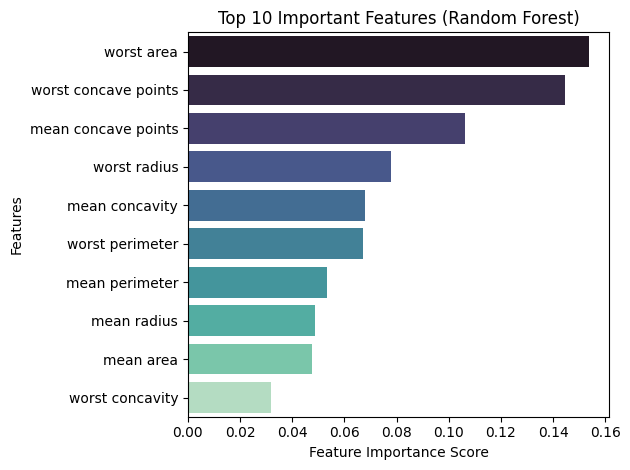

In [23]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Top 10 Important Features (Random Forest)")
sns.barplot(x=importances[indices[:10]],y = np.array(data.feature_names)[indices[:10]],palette = 'mako')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

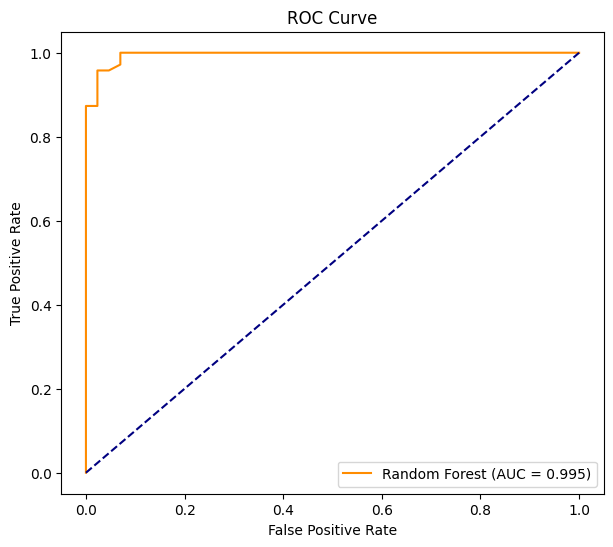

In [25]:
rf_probs = rf.predict_proba(X_test)[:,1]
fpr,tpr,_   = roc_curve(y_test,rf_probs)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', label=f"Random Forest (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()